# **1. Perkenalan**
---
### **Final Project: Clusturn**

### **CLUSTERING NOTEBOOK UNTUK CUSTOMER SEGMENTATION YANG CHURN**

**Group 2:** 
1. Azhar Muhammad
2. Nathanael August Zefanya
3. Pradita Ajeng Wiguna

Analisis segmentasi ini bertujuan untuk memahami karakteristik pelanggan yang telah churn, dengan harapan dapat:
- Mengidentifikasi pola perilaku pelanggan sebelum mereka berhenti berlangganan,
- Menyusun strategi retensi yang lebih tepat sasaran di masa mendatang,
- Memberikan insight bagi tim bisnis untuk melakukan intervensi lebih dini pada pelanggan yang masih aktif namun menunjukkan tanda-tanda menyerupai kelompok churn.


# **2. Import Libraries**
---
Pada tahap awal ini, saya mengimpor semua library yang diperlukan untuk proses pengolahan data, visualisasi, modeling, dan evaluasi model. Semua library saya kumpulkan dalam satu cell agar notebook lebih rapi.

In [207]:
# Import libraries
import pandas as pd
import numpy as np
import phik

# Libraries untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Menyimpan model
import pickle

# Mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

# **3. Data Loading**
---

In [208]:
# Load Dataset
# Dataset hasil preprocessing sebelumnya
data = pd.read_csv('customer_churn_clean.csv')

# Filter hanya data churned customers
data = data[data['churn'] == 1].reset_index(drop=True)
data.head()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn
0,0,0,37,0,875,14,0,11,2,1,2,25,40.005,1
1,0,0,37,0,0,0,0,0,2,1,2,25,0.000,1
2,23,1,33,0,955,47,16,17,2,1,2,25,117.090,1
3,13,1,36,1,5818,98,26,24,2,1,1,25,383.220,1
4,9,0,35,0,2990,41,9,16,3,1,2,30,157.240,1


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             446 non-null    int64  
 1   complains                446 non-null    int64  
 2   subscription_length      446 non-null    int64  
 3   charge_amount            446 non-null    int64  
 4   seconds_of_use           446 non-null    int64  
 5   frequency_of_use         446 non-null    int64  
 6   frequency_of_sms         446 non-null    int64  
 7   distinct_called_numbers  446 non-null    int64  
 8   age_group                446 non-null    int64  
 9   tariff_plan              446 non-null    int64  
 10  status                   446 non-null    int64  
 11  age                      446 non-null    int64  
 12  customer_value           446 non-null    float64
 13  churn                    446 non-null    int64  
dtypes: float64(1), int64(13)
m

In [210]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
call_failure,446.0,7.858744,7.869455,0.0,1.000,6.000,12.00,34.000
complains,446.0,0.426009,0.495050,0.0,0.000,0.000,1.00,1.000
subscription_length,446.0,31.683857,9.775965,3.0,31.000,35.000,37.00,45.000
charge_amount,446.0,0.248879,0.638422,0.0,0.000,0.000,0.00,4.000
seconds_of_use,446.0,1648.661435,1532.911312,0.0,438.000,1256.500,2458.00,6123.000
frequency_of_use,446.0,30.697309,26.091117,0.0,7.000,29.000,46.75,100.000
frequency_of_sms,446.0,16.849776,24.331186,0.0,1.000,11.000,24.00,204.000
distinct_called_numbers,446.0,13.080717,10.799823,0.0,3.250,11.000,20.00,48.000
age_group,446.0,2.822870,0.711079,2.0,2.000,3.000,3.00,5.000
tariff_plan,446.0,1.013453,0.115333,1.0,1.000,1.000,1.00,2.000


In [211]:
data.columns

Index(['call_failure', 'complains', 'subscription_length', 'charge_amount',
       'seconds_of_use', 'frequency_of_use', 'frequency_of_sms',
       'distinct_called_numbers', 'age_group', 'tariff_plan', 'status', 'age',
       'customer_value', 'churn'],
      dtype='object')

In [212]:
df = data.copy()

# **4. Feature Engineering**
---

### **4.1. Missing Values Handling**

In [213]:
# Mengecek missing values pada dataset
df.isnull().sum()

call_failure               0
complains                  0
subscription_length        0
charge_amount              0
seconds_of_use             0
frequency_of_use           0
frequency_of_sms           0
distinct_called_numbers    0
age_group                  0
tariff_plan                0
status                     0
age                        0
customer_value             0
churn                      0
dtype: int64

### **4.2. Outlier Handling**

In [214]:
# Kolom numerik yang akan dicek skewness
num_cols = [
    'call_failure',
    'subscription_length',
    'seconds_of_use',
    'frequency_of_use',
    'frequency_of_sms',
    'distinct_called_numbers',
    'age',
    'customer_value'
]

# Cek skewness
listItem = []
for col in num_cols:
    skew_value = df[col].skew()
    distribusi = 'normal' if -0.5 <= skew_value <= 0.5 else 'skewed'
    listItem.append([col, round(skew_value, 3), distribusi])

skewness = pd.DataFrame(listItem, columns=['kolom', 'nilai skewness', 'distribusi'])
skewness


,kolom,nilai skewness,distribusi
0,call_failure,1.115,skewed
1,subscription_length,-1.635,skewed
2,seconds_of_use,1.231,skewed
3,frequency_of_use,0.834,skewed
4,frequency_of_sms,4.778,skewed
5,distinct_called_numbers,0.638,skewed
6,age,1.389,skewed
7,customer_value,2.824,skewed


Untuk memahami karakteristik distribusi dari masing-masing fitur numerik, dilakukan perhitungan nilai skewness. Skewness mengukur derajat kemiringan distribusi data; nilai mendekati 0 mengindikasikan distribusi yang simetris (normal), sedangkan nilai positif atau negatif yang besar menunjukkan distribusi yang miring ke kanan atau kiri.

Berikut hasil perhitungan skewness pada fitur numerik:
* Seluruh fitur numerik menunjukkan distribusi yang **skewed**, baik ke kanan (positif) maupun ke kiri (negatif). Hal ini penting untuk diperhatikan karena:
    - Algoritma machine learning berbasis jarak (seperti KNN, SVM) dan berbasis linearitas (seperti Logistic Regression) cenderung sensitif terhadap distribusi yang tidak normal.
    - Skewness yang tinggi dapat mempengaruhi stabilitas model dan interpretasi fitur.


**Handling Skewness: Winsorization**

Seluruh fitur numerik dalam dataset menunjukkan adanya skewness, baik ke kanan maupun ke kiri. Oleh karena itu, dilakukan penanganan skewness dengan menggunakan teknik **Winsorization** berbasis Interquartile Range (IQR). Winsorization merupakan metode capping outlier yang menjaga sebagian besar nilai data tetap dalam skala aslinya, namun membatasi pengaruh outlier ekstrem.

Parameter Winsorizer yang digunakan:

- Metode: IQR
- Tail: Both (kanan dan kiri)
- Fold: 1.5 (batas IQR default)


In [215]:
# List kolom numerik hasil analisis skewness
num_cols = [
    'call_failure',
    'subscription_length',
    'seconds_of_use',
    'frequency_of_use',
    'frequency_of_sms',
    'distinct_called_numbers',
    'age',
    'customer_value'
]

# Membuat objek winsorizer
# Di sini saya pakai method 'iqr' karena cukup aman untuk skewness
winsor = Winsorizer(capping_method='iqr',
                    tail='both',  # bisa disesuaikan 'right' jika hanya ingin handle upper outlier
                    fold=1.5,
                    variables=num_cols)

# Fit transformer pada data latih dan transform data latih
df_capped = winsor.fit_transform(df)


call_failure - Sebelum dilakukan Capping


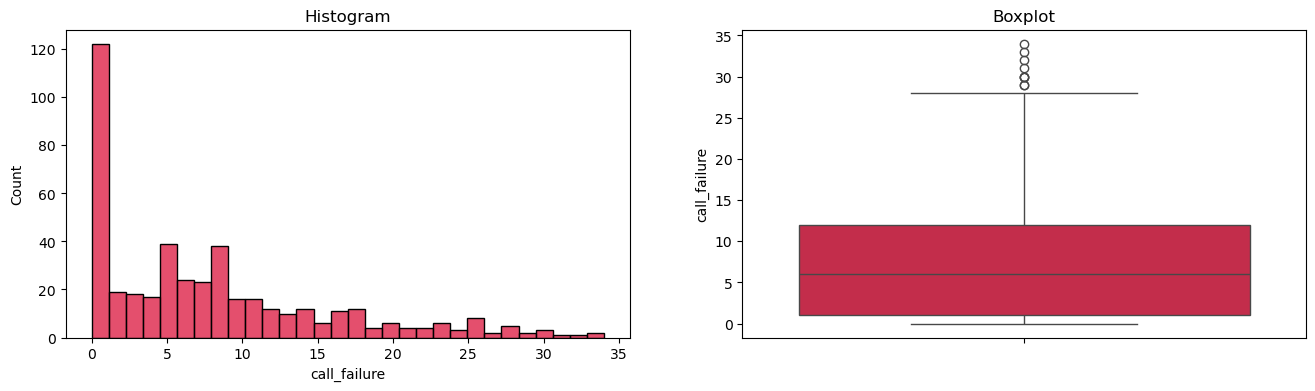


call_failure - Sesudah dilakukan Capping


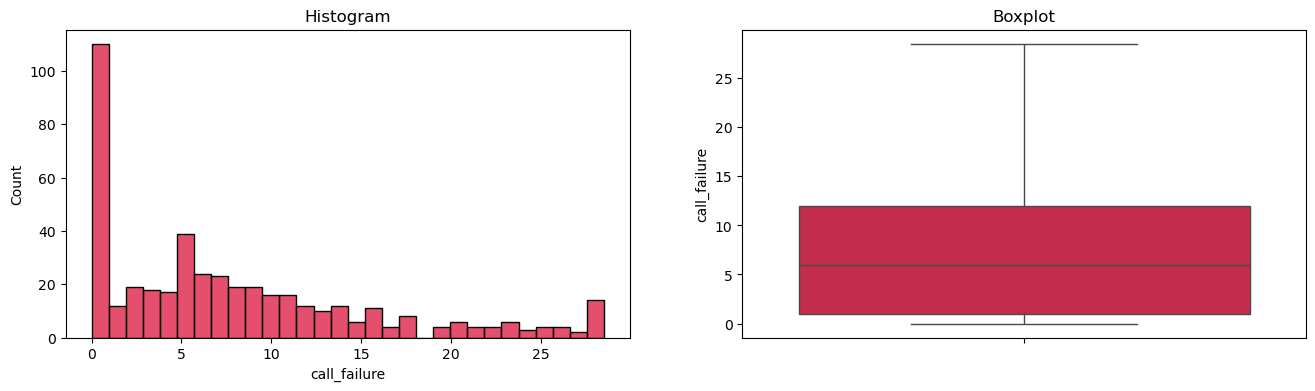

subscription_length - Sebelum dilakukan Capping


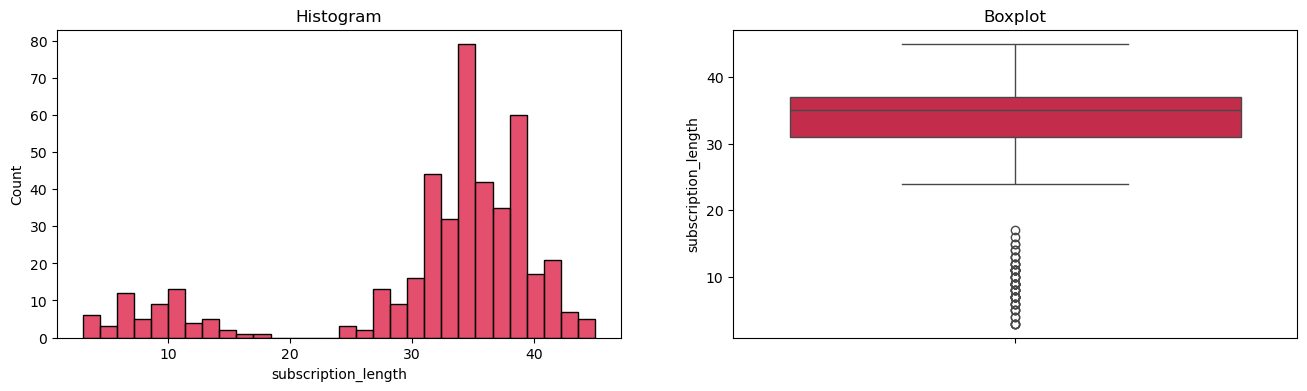


subscription_length - Sesudah dilakukan Capping


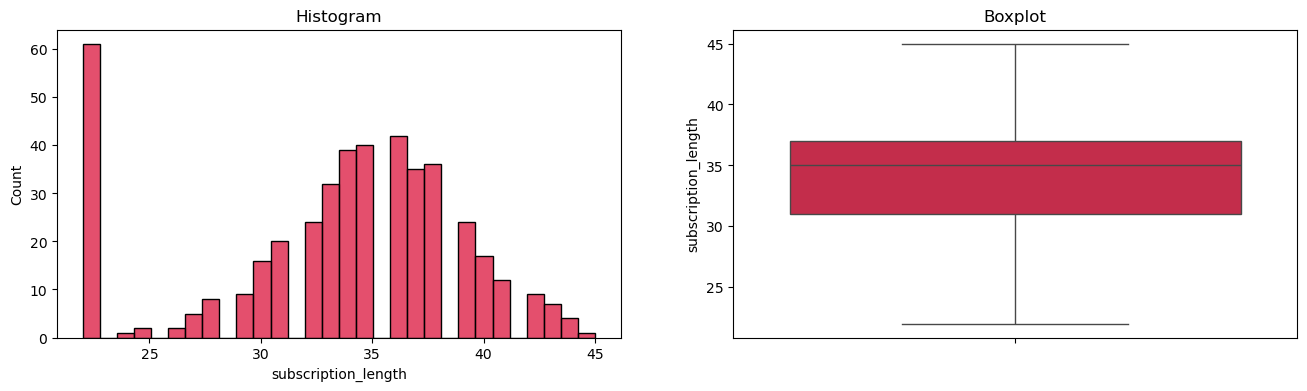

seconds_of_use - Sebelum dilakukan Capping


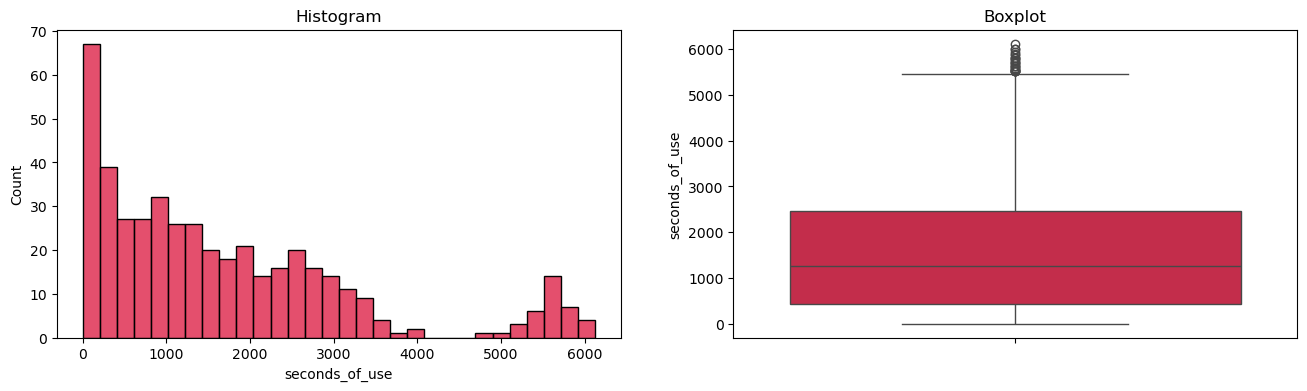


seconds_of_use - Sesudah dilakukan Capping


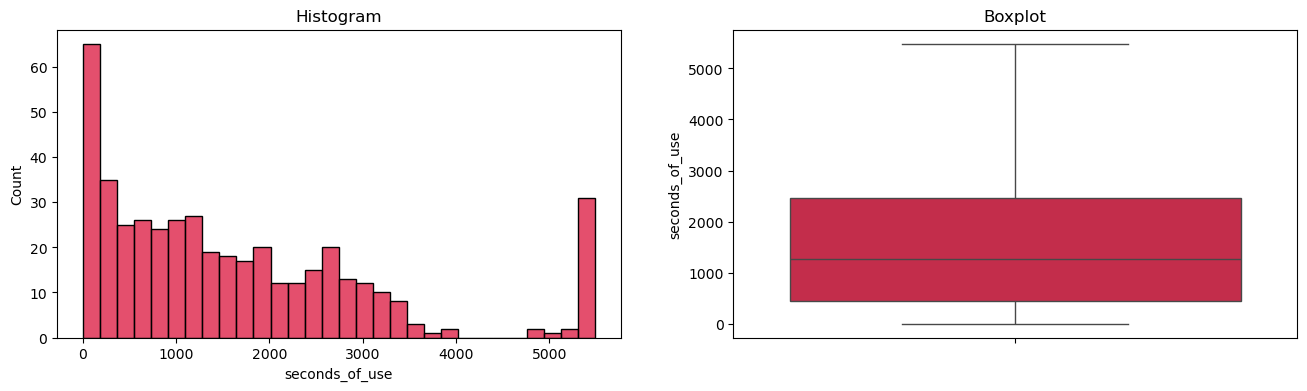

frequency_of_use - Sebelum dilakukan Capping


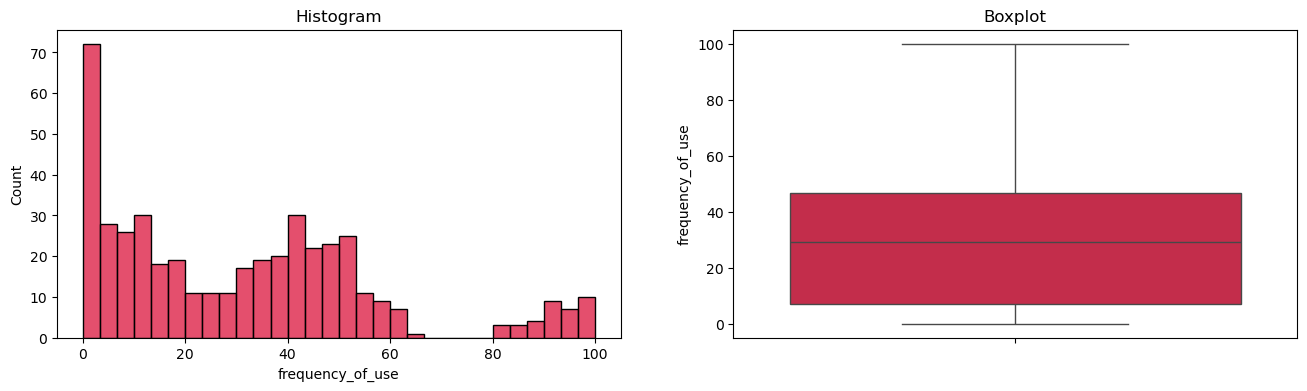


frequency_of_use - Sesudah dilakukan Capping


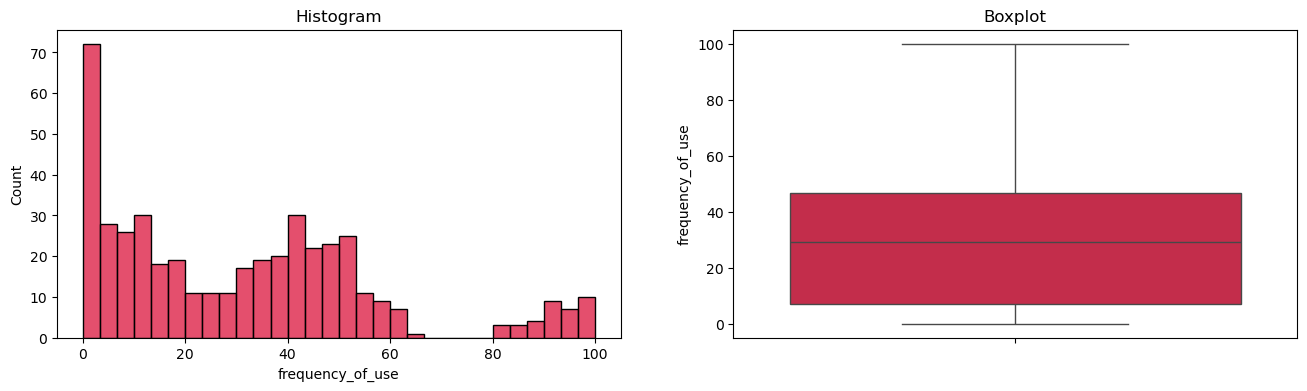

frequency_of_sms - Sebelum dilakukan Capping


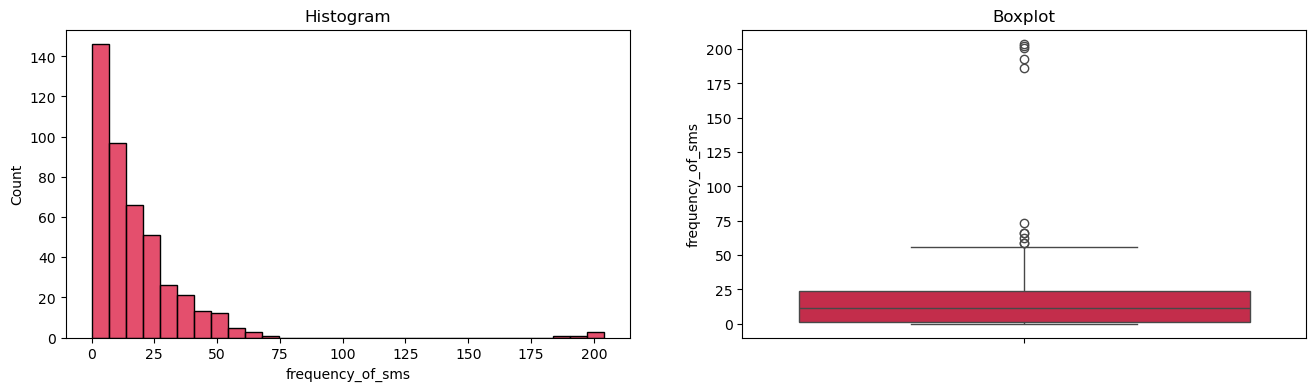


frequency_of_sms - Sesudah dilakukan Capping


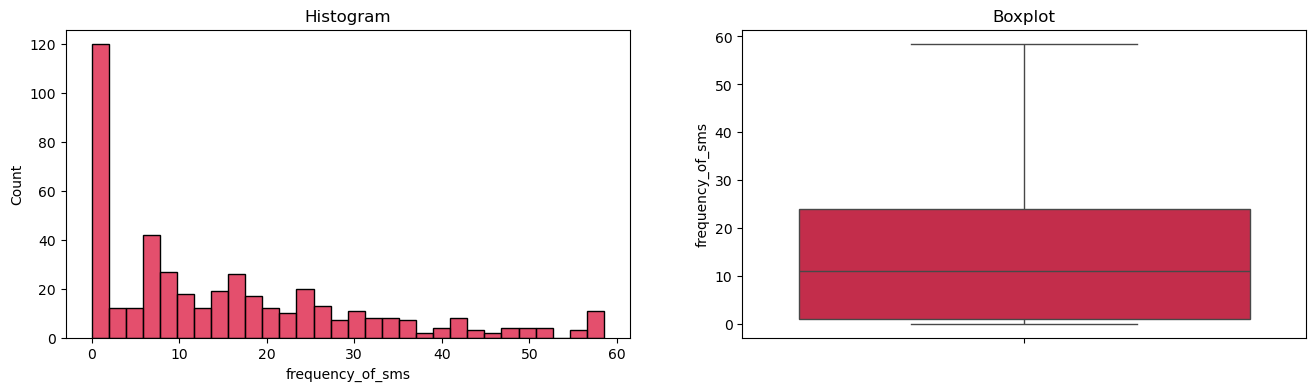

distinct_called_numbers - Sebelum dilakukan Capping


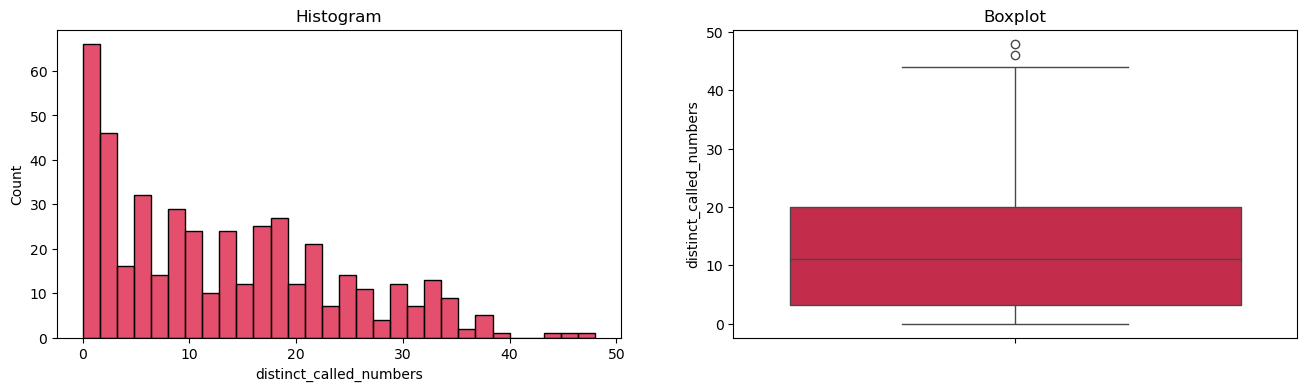


distinct_called_numbers - Sesudah dilakukan Capping


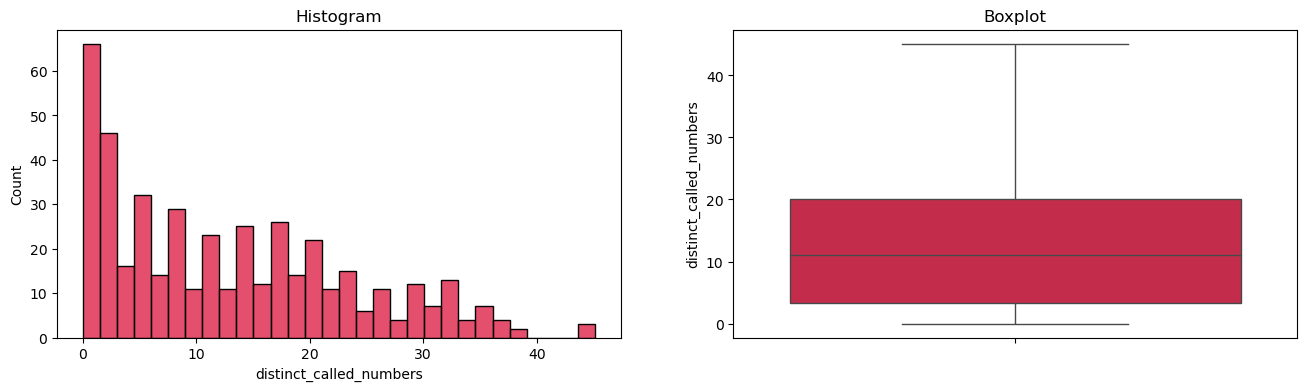

age - Sebelum dilakukan Capping


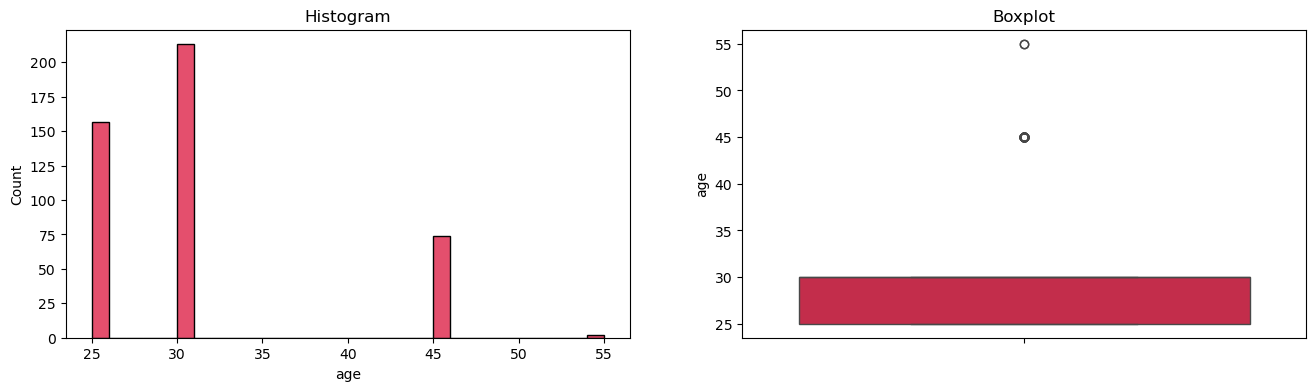


age - Sesudah dilakukan Capping


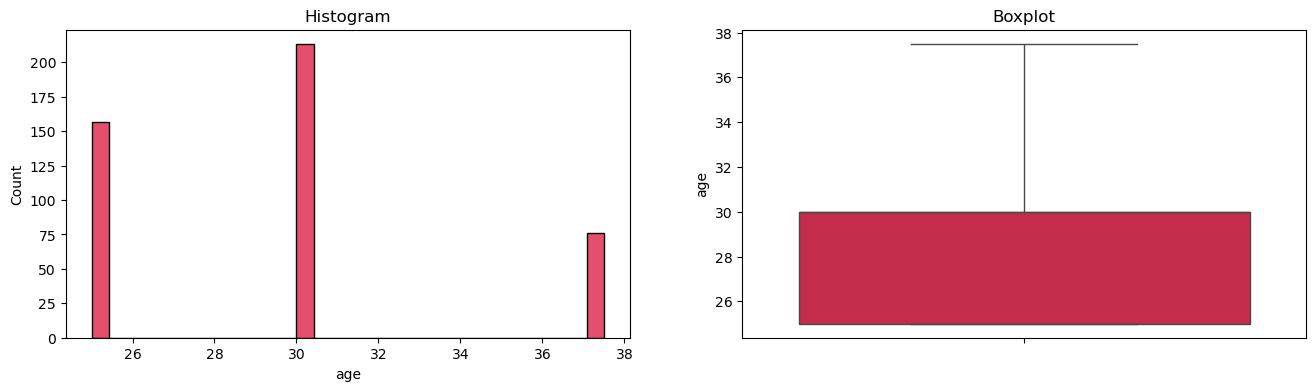

customer_value - Sebelum dilakukan Capping


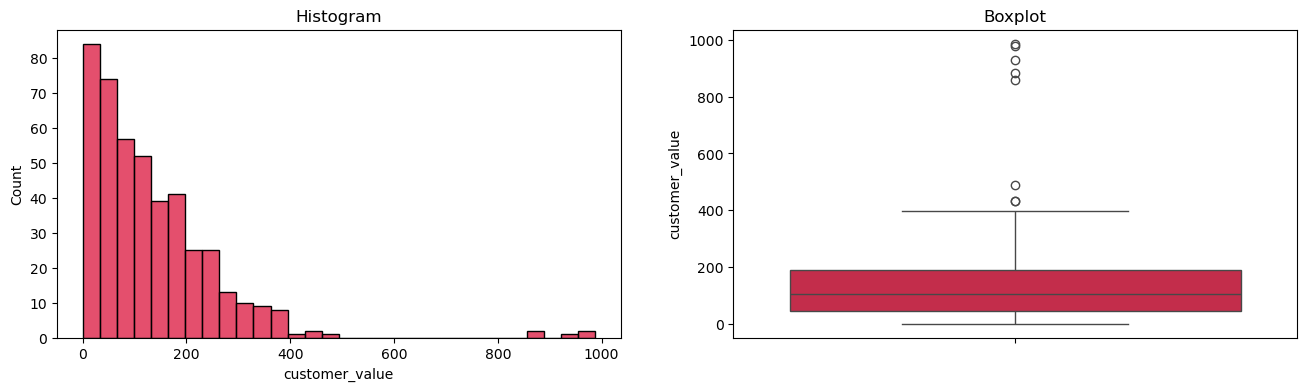


customer_value - Sesudah dilakukan Capping


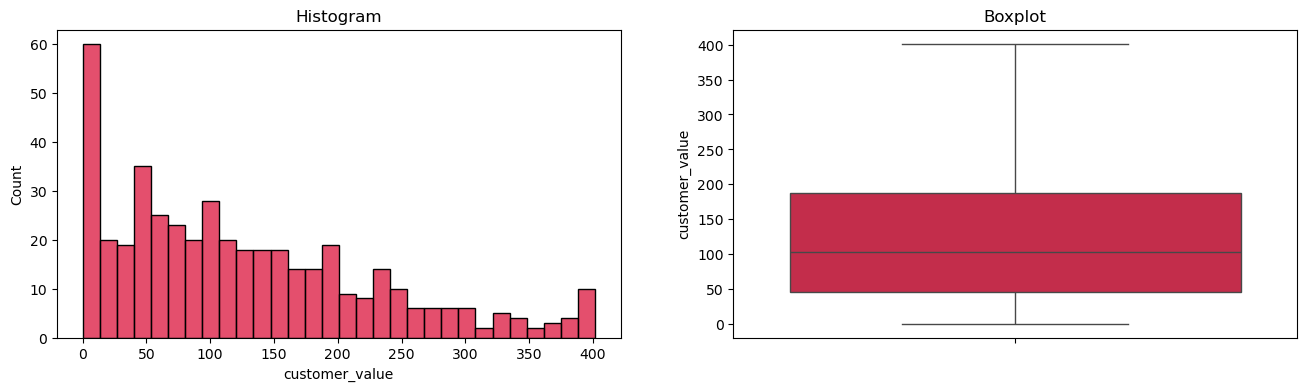

In [216]:
# Membuat visualisasi histogram dan boxplot
def plots(df, variables):
    plt.figure(figsize=(16, 4))

    # Menampilkan Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variables], bins=30, color='crimson')
    plt.title('Histogram')

    # Menampilkan Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variables], color='crimson')
    plt.title('Boxplot')

    # Menampilkan visualisasi
    plt.show()

# Melihat distribusi data sebelum dan setelah dilakukan capping
for col in num_cols:
  print(f'{col} - Sebelum dilakukan Capping')
  plots(df, col)

  print(f'\n{col} - Sesudah dilakukan Capping')
  plots(df_capped, col)

### **4.3. Feature Selection**

#### **4.3.1. Menguji Korelasi antar Fitur**

interval columns not set, guessing: ['call_failure', 'complains', 'subscription_length', 'charge_amount', 'seconds_of_use', 'frequency_of_use', 'frequency_of_sms', 'distinct_called_numbers', 'age_group', 'tariff_plan', 'status', 'age', 'customer_value', 'churn']


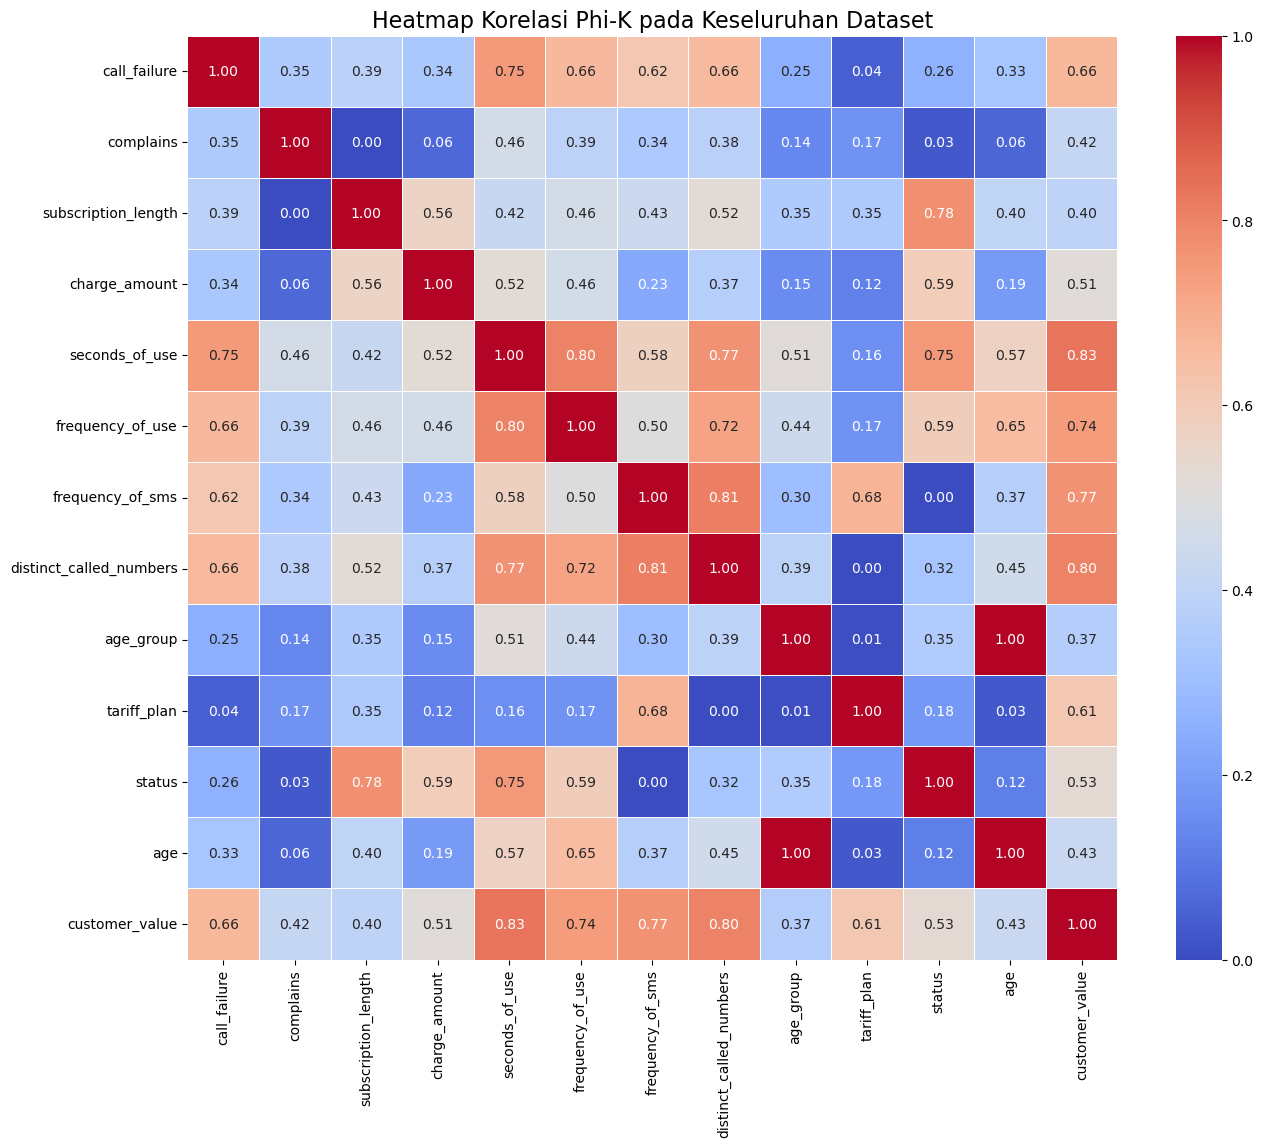

In [217]:
# Langkah 1: Hitung matriks korelasi Phi-K langsung pada seluruh data
phik_matrix_full = df_capped.phik_matrix()

# Langkah 2: Visualisasikan matriks sebagai heatmap
plt.figure(figsize=(15, 12))  # Mengatur ukuran gambar
sns.heatmap(
    phik_matrix_full,
    annot=True,          # Menampilkan nilai korelasi
    fmt=".2f",           # Format angka menjadi 2 desimal
    cmap='coolwarm',     # Gunakan skema warna yang intuitif untuk korelasi
    linewidths=.5
)
plt.title('Heatmap Korelasi Phi-K pada Keseluruhan Dataset', fontsize=16)
plt.show()

**Multikolinearitas**

In [202]:
X_vif = df_capped[['call_failure',
    'subscription_length',
    'seconds_of_use',
    'frequency_of_use',
    'frequency_of_sms',
    'distinct_called_numbers',
    'age',
    'customer_value']]

# Menghitung VIF untuk setiap fitur
vif_data = pd.DataFrame()
vif_data["fitur"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

                     fitur        VIF
0             call_failure   7.405789
1      subscription_length  32.383766
2           seconds_of_use  30.886344
3         frequency_of_use  46.120861
4         frequency_of_sms  14.817889
5  distinct_called_numbers  10.080928
6                      age  30.675068
7           customer_value  43.541039


Analisis Hasil VIF

Hasil ini menunjukkan bahwa meskipun beberapa kolom sudah dibuang, masih terdapat multikolinearitas yang sangat tinggi di antara fitur-fitur numerik. Ini adalah hal yang wajar karena banyak dari fitur ini mengukur konsep yang tumpang tindih (misalnya, 'engagement' atau 'aktivitas' pelanggan).

1. `age` (VIF: ~30): Kemungkinan karena `age` direpresentasikan juga di kolom `age_group`, sehingga keduanya memiliki korelasi yang tinggi.
2. Fitur seperti `frequency_of_use` (46.12), `customer_value` (43.54), `subscription_length` (32.38), dan `seconds_of_use` (30.88) memiliki skor yang jauh di atas ambang batas aman (umumnya 5 atau 10).
* Penyebab: Ini terjadi karena fitur-fitur ini saling berhubungan kuat. Contohnya:
    * Pelanggan yang sering menelepon (`frequency_of_use`) kemungkinan besar juga memiliki durasi total (`seconds_of_use`) yang tinggi.
    * Pelanggan yang sudah lama berlangganan (`subscription_length`) dan aktif menggunakan layanan kemungkinan besar memiliki `customer_value` yang tinggi.


**Redundansi/korelasi tinggi dari nilai Phik**
| Pasangan Fitur                                  | Nilai Korelasi | Catatan                                                            |
| ----------------------------------------------- | -------------- | ------------------------------------------------------------------ |
| `seconds_of_use` vs `customer_value`            | 0.83       | Sangat kuat. Bisa drop salah satu.  |
| `frequency_of_use` vs `seconds_of_use`          | 0.80       | Redundan. `seconds_of_use` lebih representatif.                    |
| `frequency_of_sms` vs `distinct_called_numbers` | 0.81       | Sangat mirip. Drop salah satu.                                     |
| `distinct_called_numbers` vs `customer_value`   | 0.80       | Redundan. `customer_value` menang karena ringkas dan informatif.   |
| `frequency_of_sms` vs `customer_value`          | 0.77       | Redundan. `customer_value` bisa menggantikan.                      |
| `call_failure` vs `seconds_of_use`        | 0.80           | Tidak perlu drop, karena `call_failure` adalah metrik kualitas jaringan.    |
| `status` vs `seconds_of_use`              | 0.75           | Tinggi. Tapi bisa mencerminkan behavior pelanggan, jangan langsung dibuang. |
| `complains` vs `seconds_of_use`  | 0.46               | Cenderung berdiri sendiri → bisa berguna untuk segmentasi unik (misalnya pelanggan bermasalah) |
| `age` vs `age_group`        | 1.00            | Redundan dengan `age_group`. Pilih salah satu.                                                 |
| `subscription_length` vs `customer_value` | 0.51           | Masuk akal, semakin lama berlangganan, semakin tinggi nilainya customer valuenya.            |

 **Justifikasi Pemilihan Fitur untuk Clustering Pelanggan Churn**

Dalam proyek ini, fokus analisis diarahkan pada **pelanggan yang telah melakukan churn (churn == 1)**. Tujuannya adalah untuk melakukan segmentasi terhadap pelanggan churn tersebut guna mengetahui **karakteristik umum dan pola perilaku** yang menyebabkan mereka berhenti menggunakan layanan.

Oleh karena itu, pemilihan fitur didasarkan pada tiga pertimbangan:

1. **Ada tidaknya hubungan terhadap perilaku pelanggan**, khususnya yang berkaitan dengan alasan mereka melakukan churn.
2. **Eliminasi fitur yang redundant atau memiliki korelasi sangat tinggi dengan fitur lain berdasrkan nilai phik dan VIF** untuk menghindari duplikasi informasi dalam model clustering.

**Fitur yang Dipertahankan**

*Fitur Numerik:*

1. `subscription_length`: menunjukkan lamanya pelanggan menggunakan layanan. Sangat relevan untuk mengamati apakah churn lebih sering terjadi pada pelanggan baru atau pelanggan lama.
2. `call_failure`: menunjukkan kualitas jaringan. Call failure yang tinggi dapat menjadi indikator pengalaman buruk yang memicu churn.
3. `customer_value`: merupakan fitur agregat yang merepresentasikan nilai pelanggan dari sisi penggunaan (durasi panggilan, jumlah SMS, dsb). Fitur ini kemungkinan cukup mewakili perilaku pemakaian tanpa harus menyertakan fitur-fitur granular lain yang redundant.

*Fitur Kategorikal:*

1. `complains`: menunjukkan apakah pelanggan pernah mengajukan keluhan. Sangat penting untuk menganalisis pengaruh customer service terhadap churn.
2. `tariff_plan`: memberikan gambaran mengenai jenis paket yang digunakan pelanggan. Bisa membantu mengidentifikasi apakah paket tertentu lebih rentan terhadap churn.
3. `status`: menunjukkan status langganan pelanggan sebelum akhirnya churn. Ini bisa mencerminkan tingkat keterikatan (engagement) pelanggan terhadap layanan.
4. `age_group`: digunakan sebagai representasi demografis pelanggan. Mengelompokkan pelanggan berdasarkan usia dapat membantu menemukan kelompok umur tertentu yang lebih rawan churn.
5. `charge_amount`: fitur ordinal yang secara semantik dia menyiratkan tingkat beban biaya yang ditanggung pelanggan.

**Fitur yang di-drop**

Beberapa fitur didrop karena memiliki korelasi sangat tinggi dengan fitur agregat (`customer_value`) atau tidak memberikan informasi baru yang signifikan:

* `seconds_of_use`, `frequency_of_use`, `frequency_of_sms`, `distinct_called_numbers`
  Fitur-fitur ini telah dirangkum secara efektif ke dalam `customer_value`, sehingga dipandang redundant.

* `age`
  Di-drop karena telah direpresentasikan dalam bentuk kategori (`age_group`), yang lebih sederhana dan cocok untuk interpretasi segmentasi.

Dengan mempertahankan fitur-fitur yang relevan terhadap perilaku pengguna dan alasan potensial pelanggan melakukan churn, serta menghindari multikolinearitas, pemodelan clustering ini diharapkan mampu memberi informasi bermakna mengenai segmentasi churn. Hasil segmentasi ini nantinya bisa digunakan untuk **merancang strategi retensi pelanggan** yang lebih terfokus dan efektif.


In [175]:
df_capped.columns

Index(['call_failure', 'complains', 'subscription_length', 'charge_amount',
       'seconds_of_use', 'frequency_of_use', 'frequency_of_sms',
       'distinct_called_numbers', 'age_group', 'tariff_plan', 'status', 'age',
       'customer_value', 'churn'],
      dtype='object')

In [222]:
# Daftar kolom yang akan dihapus
columns_to_drop = ['seconds_of_use', 'frequency_of_use',
                   'frequency_of_sms', 'distinct_called_numbers',
                   'age','churn'     
]
# Menghapus kolom dari df_capped
df_selected = df_capped.drop(columns=columns_to_drop)

# Menampilkan 5 data pertama
df_selected

,call_failure,complains,subscription_length,charge_amount,age_group,tariff_plan,status,customer_value
0,0.0,0,37,0,2,1,2,40.005
1,0.0,0,37,0,2,1,2,0.000
2,23.0,1,33,0,2,1,2,117.090
3,13.0,1,36,1,2,1,1,383.220
4,9.0,0,35,0,3,1,2,157.240
...,...,...,...,...,...,...,...,...
441,2.0,1,22,1,3,1,1,43.840
442,28.0,1,35,0,3,1,2,144.520
443,14.0,0,38,0,4,1,2,168.075
444,8.0,1,22,2,3,1,1,100.680


In [203]:
X_vif = df_capped[['call_failure',
    'subscription_length',
    'customer_value']]

# Menghitung VIF untuk setiap fitur
vif_data = pd.DataFrame()
vif_data["fitur"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

                 fitur       VIF
0         call_failure  2.492219
1  subscription_length  2.899383
2       customer_value  3.029905


Setelah melakukan pemilihan fitur, nilai VIF untuk fitur numerik yang tersisa (`customer_value`, `subscription_length`, dan `call_failure`) memiliki skor VIF jauh di bawah ambang batas kritis 5 (atau 10). Hasil ini menandakan bahwa tidak ada lagi masalah multikolinearitas yang serius di antara ketiga fitur ini. Setiap fitur sekarang memberikan informasi yang relatif independen dan tidak tumpang tindih secara berlebihan satu sama lain.

#### **Preprocessing Pipeline**

In [177]:
# Kolom numerik (continuous)
numerical_cols_selected = ['call_failure', 'subscription_length','customer_value']

# Kolom ordinal (karena ada urutannya)
ordinal_cols_selected = ['charge_amount', 'age_group']

# Kolom kategorikal nominal (tanpa urutan)
categorical_cols_selected = ['complains', 'tariff_plan', 'status']

print(f"Kolom Numerik: {numerical_cols_selected}")
print(f"Kolom Ordinal: {ordinal_cols_selected}")
print(f"Kolom Kategorikal: {categorical_cols_selected}")

Kolom Numerik: ['call_failure', 'subscription_length', 'customer_value']
Kolom Ordinal: ['charge_amount', 'age_group']
Kolom Kategorikal: ['complains', 'tariff_plan', 'status']


In [178]:
# Standardisasi numerik sebelum PCA
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_cols_selected])

In [179]:
# Inisialisasi PCA
pca = PCA()
# Fit PCA pada data yang sudah di-scale
pca.fit(numerical_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

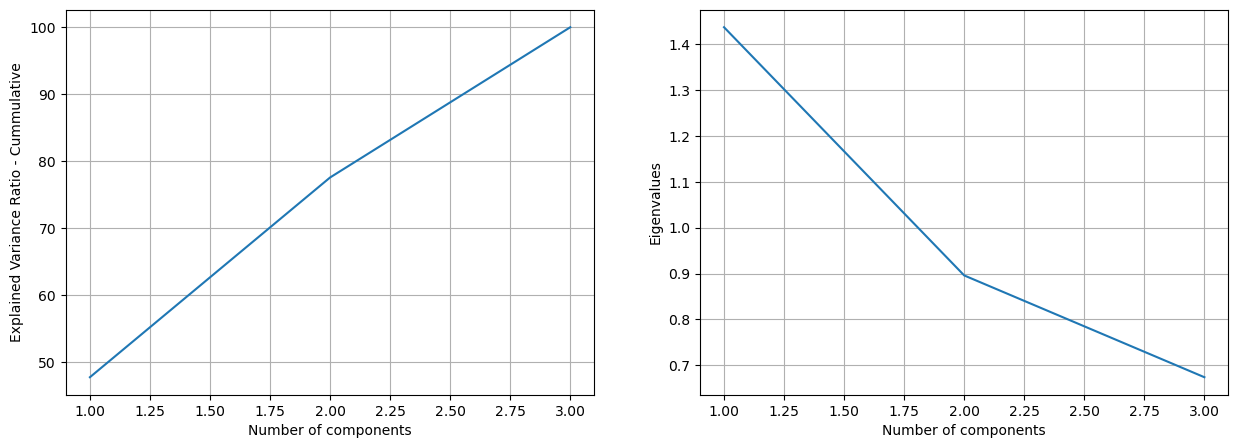

In [180]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

**Grafik Kiri — Cumulative Explained Variance Ratio**
* Dengan **1 komponen**: menjelaskan \~47% variansi.
* Dengan **2 komponen**: menjelaskan \~78% variansi.
* Dengan **3 komponen**: sudah menjelaskan 100% variansi.

**Grafik Kanan — Scree Plot (Eigenvalues)**

* Komponen 1 & 2 punya eigenvalue paling besar → paling informatif.
* Setelah komponen ke-2, eigenvalue mulai menurun signifikan.

In [181]:
# Cek jumlah fitur yang ingin dipertahankan jika kita ingin menyimpan 95% informasi
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

np.int64(3)

In [182]:
# PCA untuk kolom numerik
pca = PCA(n_components=3) 
numerical_pca = pca.fit_transform(numerical_scaled)

In [183]:
# Mendefinisikan urutan kolom sesuai urutan di df_cluster
numerical_pca_cols = [f'pca_{i}' for i in range(numerical_pca.shape[1])]
ordinal_cols = ordinal_cols_selected
categorical_cols = categorical_cols_selected

# Gabungkan semuanya dengan nama kolom lengkap
final_columns = numerical_pca_cols + ordinal_cols + categorical_cols

In [184]:
# Buat dataframe gabungan
df_cluster = pd.concat([
    pd.DataFrame(numerical_pca, columns=numerical_pca_cols),
    df[ordinal_cols].reset_index(drop=True),
    df[categorical_cols].astype(str).reset_index(drop=True)
], axis=1)

In [185]:
# Dapatkan index kolom kategorikal setelah digabung
categorical_indices = [final_columns.index(col) for col in categorical_cols]

In [186]:
print("Final columns:", final_columns)
print("Categorical indices:", categorical_indices)
print("df_cluster.shape:", df_cluster.shape)
print("df_cluster.columns:", df_cluster.columns.tolist())

Final columns: ['pca_0', 'pca_1', 'pca_2', 'charge_amount', 'age_group', 'complains', 'tariff_plan', 'status']
Categorical indices: [5, 6, 7]
df_cluster.shape: (446, 8)
df_cluster.columns: ['pca_0', 'pca_1', 'pca_2', 'charge_amount', 'age_group', 'complains', 'tariff_plan', 'status']


### **Menentukan Jumlah Cluster**


#### **Using Elbow Method**


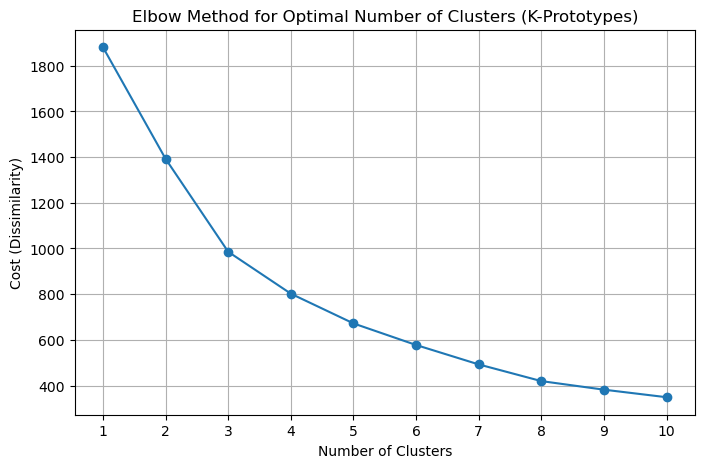

In [187]:
# Menyimpan cost untuk setiap jumlah cluster
cost = []
K = range(1, 11)  # coba dari 1 sampai 10 cluster

for k in K:
    kproto = KPrototypes(n_clusters=k, random_state=42, verbose=0)
    clusters = kproto.fit_predict(df_cluster, categorical=categorical_indices)
    cost.append(kproto.cost_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, cost, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (K-Prototypes)')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost (Dissimilarity)')
plt.xticks(K)
plt.grid(True)
plt.show()


Analisis grafik:
* Cost masih menunjukkan pola penurunan yang signifikan dari cluster 1 hingga 3.
* Setelah cluster ke-4, penurunan Cost mulai melandai.
* Dari cluster 5 ke atas, meskipun Cost masih turun, tetapi tidak drastis

Dari grafik ini, elbow point paling terlihat di sekitar k= 3. Setelah itu, penurunan Cost tidak lagi signifikan. Maka, **k= 3 kemungkinan adalah jumlah klaster optimal**.

# **5. Modeling**
---


### **5.1. Train Model dengan Jumlah Cluster yang Optimal**

In [188]:
# Train model dengan jumlah cluster yang optimal
# Inisialisasi model K-Means dengan 3 cluster
k_optimal = 3
kproto = KPrototypes(n_clusters=k_optimal, random_state=42)
clusters = kproto.fit_predict(df_cluster, categorical=categorical_indices)
# Menampilkan hasil prediksi
clusters

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0,
       1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1,
       0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0,
       2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1,
       1, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1,
       1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1,
       1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0,

### **5.2. Menggabungkan Label Cluster ke DataFrame Asli**

In [189]:
# Memasukkan label cluster ke DataFrame asli 
df_capped['cluster'] = clusters      # Menggunakan df_capped karena sudah dilakukan penanganan missing values dan capping ouliers
# Menampilkan dataset dengan label cluster
df_capped

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn,cluster
0,0.0,0,37,0,875,14,0.0,11.0,2,1,2,25.0,40.005,1,1
1,0.0,0,37,0,0,0,0.0,0.0,2,1,2,25.0,0.000,1,1
2,23.0,1,33,0,955,47,16.0,17.0,2,1,2,25.0,117.090,1,0
3,13.0,1,36,1,5488,98,26.0,24.0,2,1,1,25.0,383.220,1,0
4,9.0,0,35,0,2990,41,9.0,16.0,3,1,2,30.0,157.240,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2.0,1,22,1,1082,14,0.0,9.0,3,1,1,30.0,43.840,1,2
442,28.0,1,35,0,1260,53,23.0,19.0,3,1,2,30.0,144.520,1,0
443,14.0,0,38,0,2573,50,41.0,33.0,4,1,2,37.5,168.075,1,0
444,8.0,1,22,2,1792,25,7.0,9.0,3,1,1,30.0,100.680,1,2


In [190]:
# Menyimpan Dataset dengan Label Cluster
df_clustered = df_capped.copy()
df_clustered.to_csv('customer_clustered.csv', index=False)

### **5.3. Visualisasi Cluster 2D menggunakan 2 komponen PCA**

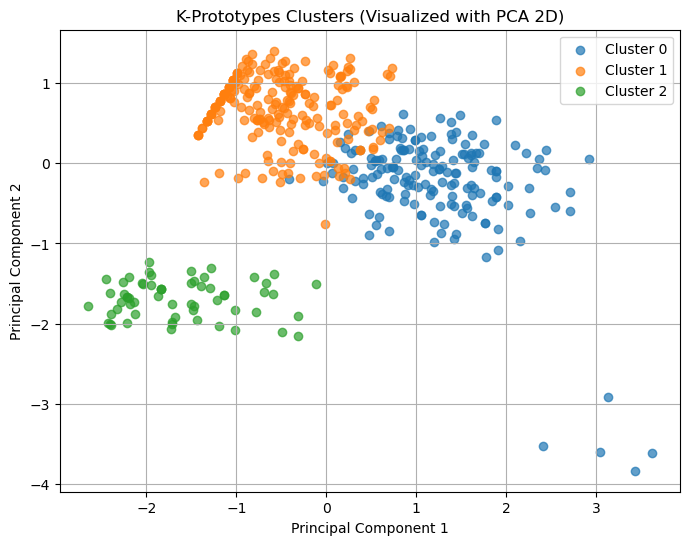

In [191]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=2)
numerical_pca_2d = pca_2d.fit_transform(numerical_scaled)
# Transform data ke dalam ruang baru dengan 2 principal components
df_pca_2d = pd.DataFrame(numerical_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['cluster'] = clusters 
# Visualisasi hasil clustering
plt.figure(figsize=(8,6))
for cluster in sorted(df_pca_2d['cluster'].unique()):
    subset = df_pca_2d[df_pca_2d['cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('K-Prototypes Clusters (Visualized with PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# **6. EDA - Setelah Clustering**
---

### **6.1. Distribusi Jumlah Nasabah dalam setiap Cluster**

In [192]:
df_clustered.head()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn,cluster
0,0.0,0,37,0,875,14,0.0,11.0,2,1,2,25.0,40.005,1,1
1,0.0,0,37,0,0,0,0.0,0.0,2,1,2,25.0,0.000,1,1
2,23.0,1,33,0,955,47,16.0,17.0,2,1,2,25.0,117.090,1,0
3,13.0,1,36,1,5488,98,26.0,24.0,2,1,1,25.0,383.220,1,0
4,9.0,0,35,0,2990,41,9.0,16.0,3,1,2,30.0,157.240,1,1


In [193]:
# Menampilkan jumlah anggota per cluster
df_clustered['cluster'].value_counts().sort_index()

cluster
0    169
1    216
2     61
Name: count, dtype: int64

In [194]:
# Menghitung rata-rata churn rate untuk setiap segmen
churn_rate_per_segment = df_clustered.groupby('cluster')['churn'].mean() * 100
print(churn_rate_per_segment)

cluster
0    100.0
1    100.0
2    100.0
Name: churn, dtype: float64


Dataset telah difilter hanya untuk **pelanggan dengan status `churn = 1`**, yaitu pelanggan yang telah berhenti menggunakan layanan.

```python
data = data[data['churn'] == 1]
```

Karena seluruh data merupakan pelanggan yang churn, maka:
* **Tingkat churn di setiap cluster adalah 100%**

**Hasil Segmentasi**

Setelah dilakukan proses clustering menggunakan metode **K-Prototypes** (karena data mengandung kombinasi numerik dan kategorikal), diperoleh hasil sebagai berikut:

| Cluster | Jumlah Anggota | Churn Rate |
| ------- | -------------- | ---------- |
| 0       | 169            | 100%       |
| 1       | 216            | 100%       |
| 2       | 61             | 100%       |

Karena seluruh anggota sudah **churn**, maka **nilai utama dari segmentasi ini bukan untuk prediksi churn**, melainkan untuk **membedakan profil dan pola perilaku** di antara pelanggan yang churn:

* Cluster tertentu mungkin berisi pelanggan dengan masa langganan pendek, penggunaan rendah, dan nilai pelanggan (customer value) rendah — yang bisa dikategorikan sebagai **churn pasif**.
* Sementara cluster lain bisa jadi menunjukkan pelanggan dengan penggunaan tinggi dan masa langganan lama — **churn aktif** yang lebih berisiko secara finansial.


### **6.2. Analisis Statistik Deskriptif per Cluster**

Segmentasi pelanggan yang telah *churn* menghasilkan **3 klaster berbeda**, masing-masing dengan karakteristik unik berdasarkan perilaku dan profil pelanggan.

**Karakteristik Cluster 0**

In [195]:
# Statistik Deskriptif Cluster 0
cluster_0 = df_clustered[df_clustered["cluster"] == 0]
cluster_0.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,169.0,15.26,6.99,0.00,10.00,14.0,20.0,28.50
complains,169.0,0.62,0.49,0.00,0.00,1.0,1.0,1.00
subscription_length,169.0,34.91,3.74,25.00,33.00,35.0,37.0,44.00
charge_amount,169.0,0.18,0.47,0.00,0.00,0.0,0.0,2.00
seconds_of_use,169.0,2651.58,1652.92,245.00,1200.00,2493.0,3375.0,5488.00
frequency_of_use,169.0,56.33,19.63,16.00,44.00,50.0,59.0,100.00
frequency_of_sms,169.0,25.35,16.87,0.00,11.00,24.0,36.0,58.50
distinct_called_numbers,169.0,22.23,8.34,2.00,17.00,20.0,29.0,45.12
age_group,169.0,2.66,0.64,2.00,2.00,3.0,3.0,4.00
tariff_plan,169.0,1.04,0.19,1.00,1.00,1.0,1.0,2.00


**Cluster 0 – Aktif, berpengalaman, tapi churn karena kualitas**

**Ciri-ciri:**
* **Masa langganan**: Panjang (rata-rata 35 bulan)
* **Penggunaan tinggi**:
  * Rata-rata *seconds\_of\_use* > 2600
  * *frequency\_of\_use* dan *frequency\_of\_sms* juga tinggi
* **Call failure sangat tinggi**: \~15, tertinggi di antara cluster lain
* **Charge amount sangat rendah**: 0.18 → hampir tidak dikenai biaya ekstra
* **Customer value**: Sangat tinggi (rata-rata 213.27)
* **Demografi**: Usia muda hingga pertengahan (rata-rata 28.5 tahun)

**Interpretasi:**
Pelanggan ini sangat aktif dan loyal, tapi mengalami **masalah teknis (call failure)**. Meskipun mereka tidak terbebani biaya tinggi, pengalaman buruk kemungkinan jadi alasan churn.

**Karakteristik Cluster 1**

In [196]:
# Statistik Deskriptif Cluster 1
cluster_1 = df_clustered[df_clustered["cluster"] == 1]
cluster_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,216.0,3.06,3.26,0.0,0.00,2.00,5.00,12.00
complains,216.0,0.25,0.43,0.0,0.00,0.00,0.00,1.00
subscription_length,216.0,35.56,3.89,24.0,33.00,36.00,38.00,45.00
charge_amount,216.0,0.05,0.27,0.0,0.00,0.00,0.00,2.00
seconds_of_use,216.0,889.17,1033.24,0.0,6.00,461.50,1405.50,5253.00
frequency_of_use,216.0,13.98,15.82,0.0,0.75,8.00,24.00,82.00
frequency_of_sms,216.0,9.67,10.55,0.0,0.00,7.00,16.00,48.00
distinct_called_numbers,216.0,7.47,8.54,0.0,0.75,4.00,11.00,33.00
age_group,216.0,2.98,0.79,2.0,2.00,3.00,4.00,5.00
tariff_plan,216.0,1.00,0.00,1.0,1.00,1.00,1.00,1.00


**Cluster 1 – Pasif, jarang pakai, churn karena tidak melihat benefitnya**

**Ciri-ciri:**
* **Masa langganan**: Lama (rata-rata 35.5 bulan)
* **Penggunaan sangat rendah**:
  * *seconds\_of\_use*: hanya 889 detik
  * *frequency\_of\_use*: 13.98
  * *frequency\_of\_sms*: 9.67
* **Call failure sangat rendah** (\~3)
* **Charge amount sangat rendah** (0.05)
* **Customer value**: Terendah (68.39)
* **Usia sedikit lebih tua** (rata-rata 30.5 tahun)

**Interpretasi:**
Ini adalah pengguna pasif yang jarang memakai layanan. Churn terjadi kemungkinan besar karena **tidak melihat manfaat atau keterikatan dengan layanan**. Mereka tidak pernah mengalami masalah teknis ataupun biaya tinggi, tapi tetap pergi karena biasa saja.

**Karakteristik Cluster 2**

In [197]:
# Statistik Deskriptif Cluster 2
cluster_1 = df_clustered[df_clustered["cluster"] == 2]
cluster_1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
call_failure,61.0,3.97,3.97,0.0,0.0,3.00,7.0,14.00
complains,61.0,0.52,0.50,0.0,0.0,1.00,1.0,1.00
subscription_length,61.0,22.00,0.00,22.0,22.0,22.00,22.0,22.00
charge_amount,61.0,1.15,1.08,0.0,0.0,1.00,2.0,4.00
seconds_of_use,61.0,1462.95,467.50,0.0,1193.0,1487.00,1783.0,2502.00
frequency_of_use,61.0,18.90,8.64,0.0,13.0,19.00,25.0,36.00
frequency_of_sms,61.0,6.80,9.02,0.0,0.0,3.00,10.0,39.00
distinct_called_numbers,61.0,7.56,4.98,0.0,4.0,7.00,10.0,24.00
age_group,61.0,2.74,0.44,2.0,2.0,3.00,3.0,3.00
tariff_plan,61.0,1.00,0.00,1.0,1.0,1.00,1.0,1.00


**Cluster 2 – Pelanggan baru yang kecewa karena biaya**

**Ciri-ciri:**
* **Masa langganan sangat pendek**: hanya 22 bulan (paling rendah)
* **Usage sedang**: sekitar 1462 detik, frequency sedang
* **Call failure dan complain moderat**
* **Charge amount tertinggi**: 1.15 → bisa berarti dikenai biaya ekstra sejak awal
* **Customer value**: Rendah-menengah (87.87)
* **Usia lebih muda** (28.69)

**Interpretasi:**
Pelanggan ini churn lebih awal. Mereka kemungkinan merasa **biaya terlalu tinggi di awal** dan tidak sempat merasakan manfaat penuh. Perlu diperhatikan dalam onboarding agar tidak kehilangan mereka terlalu cepat.

**Rangkuman**
| Cluster | Aktivitas | Lama Langganan | Biaya (Charge) | Keluhan Teknis | Potensi Alasan Churn  |
| ------- | --------- | -------------- | -------------- | -------------- | --------------------- |
| 0       | Tinggi    | Lama           | Rendah         | Tinggi         | Masalah teknis        |
| 1       | Rendah    | Lama           | Sangat rendah  | Rendah         | Tidak melihat benefit |
| 2       | Sedang    | Pendek         | Tinggi         | Sedang         | Beban biaya di awal   |

# **7. Model Saving**
---


In [198]:
# Daftar fitur numerik
numerical_cols = ['call_failure', 'subscription_length','customer_value']
# Daftar kategorikal
# Ini adalah daftar lengkap yang akan ditangani oleh K-Prototypes sebagai kategori
all_categorical_cols = ['charge_amount', 'age_group', 'complains', 'tariff_plan', 'status']
final_columns_order = df_selected.columns.tolist()

model_bundle = {
    'kproto_model': kproto,
    'pca_model': pca,
    'scaler': scaler,
    'numerical_cols': numerical_cols,
    'categorical_cols': all_categorical_cols,
    'final_columns_order': final_columns_order,
    'categorical_indices': categorical_indices  # <-- tambahkan ini!
}

with open('kproto_bundle.pkl', 'wb') as f:
    pickle.dump(model_bundle, f)